# Baseline (Tree Model)¶

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [0]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [0]:
path = '/content/drive/My Drive/fire_predict/base_data/'
train = pd.read_csv(path + 'PJT002_train.csv')
val = pd.read_csv(path + 'PJT002_validation.csv')
test = pd.read_csv(path + 'PJT002_test.csv')
sub = pd.read_csv(path + 'PJT002_submission.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train.head()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,...,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,133759,2015-10-03 02:33:46,NaN,NaN,3,112.86,112.86,200.0,NaN,1.0,0.0,NaN,15.8,NaN,1.6,360.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 통영시 용남면,11613.0,1727,478038.0,609,161.0,N,129,0,0,809,2453,17664,83,0,N
1,96248,2016-11-13 17:05:57,업무시설,철근콘크리트구조,3,721.82,1109.54,0.0,1.9881e+07,5.0,0.0,공공용,15.6,NaN,1.3,20.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,업무용,중로한면,경상남도 통영시 용남면,13511.0,2659,NaN,79,161.0,N,27,5,1,1731,2561,18136,50,0,N
2,71317,2016-11-21 12:46:36,단독주택,블록구조,4,47.06,47.06,288.0,1.96501e+07,1.0,0.0,주거용,15.7,NaN,4.3,360.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,생산녹지지역,지정되지않음,단독,소로한면,경상남도 통영시 용남면,13511.0,4093,671829.0,259,161.0,N,273,0,0,825,3964,14944,270,1,N
3,86638,2016-11-07 02:50:14,위험물저장및처리시설,벽돌구조,2,171.45,176.64,1379.0,2.00201e+07,2.0,0.0,상업용,13.7,NaN,2.8,360.0,77.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,주,자연녹지지역,지정되지않음,상업용,중로한면,경상남도 통영시 용남면,13511.0,5931,NaN,103,161.0,N,109,0,0,1264,2572,15104,132,0,N
4,97748,2014-01-28 16:36:43,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,10.4,NaN,4.7,320.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 거창군 북상면,1646.0,10433,522466.0,8302,109.0,N,739,0,0,10241,100127,5000,5004,0,N


In [0]:
train.shape

(59199, 172)

In [0]:
val.head()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,...,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,91161,2018-06-28 03:18:03,숙박시설,철근콘크리트구조,1,303.80,1787.00,437.90,20020823.0,6.0,1.0,상업용,22.8,NaN,1.0,230.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,일반상업지역,지정되지않음,상업용,중로한면,경상남도 김해시 북부동,83288.0,673,NaN,46,201.0,N,148,0,2,196,181,19071,157,9,N
1,84935,2014-12-29 10:24:46,창고시설,일반철골구조,1,353.85,353.85,1022.00,20150629.0,1.0,0.0,기타,3.6,NaN,1.4,180.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,창,NaN,NaN,NaN,NaN,경상남도 김해시 불암동,8727.0,2851,NaN,87,201.0,N,49,1,0,389,1202,20785,86,17,N
2,105570,2014-09-17 17:21:40,제2종근린생활시설,일반목구조,2,136.12,136.12,386.77,19920330.0,2.0,0.0,상업용,22.1,NaN,1.2,160.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제1종일반주거지역,지정되지않음,공업용,소로각지,경상남도 김해시 대동면,7451.0,3772,NaN,124,201.0,N,92,0,0,2956,6986,26847,382,0,N
3,114181,2018-06-02 15:57:00,제1종근린생활시설,기타조적구조,1,26.69,26.69,52.00,20010216.0,1.0,0.0,상업용,26.4,NaN,4.1,140.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,임,개발제한구역,지정되지않음,토지임야,맹지,경상남도 김해시 진례면,7327.0,3672,NaN,416,178.0,N,666,0,0,755,3889,6006,2581,0,Y
4,82239,2017-06-06 16:10:05,교육연구시설,철근콘크리트구조,15,4051.77,11620.22,0.00,19640204.0,17.0,2.0,문교사회용,20.4,NaN,2.8,160.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,학,제2종일반주거지역,지정되지않음,주거기타,소로각지,경상남도 김해시 북부동,84649.0,505,NaN,111,201.0,N,123,0,0,345,306,19098,70,27,N


In [0]:
val.shape

(6898, 172)

In [0]:
test.head()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,...,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,122699,2017-04-07 09:25:23,단독주택,벽돌구조,1,74.84,114.17,191.0,19860701.0,2.0,0.0,주거용,15.9,NaN,1.2,290.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제1종일반주거지역,지정되지않음,단독,세로한면(불),경상남도 김해시 회현동,8288.0,679,1042305.0,41,201.0,N,77,1,1,46,95,18159,101,6
1,125440,2017-04-29 20:04:09,단독주택,블록구조,4,70.00,70.00,0.0,19601220.0,2.0,0.0,주거용,19.7,NaN,2.4,250.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,단독,세로각지(가),경상남도 김해시 내외동,82346.0,858,1294737.0,71,201.0,N,17,2,2,239,159,17172,263,4
2,75921,2014-09-15 23:11:28,NaN,NaN,2,135.11,135.11,380.0,NaN,1.0,0.0,NaN,22.0,NaN,0.9,290.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 김해시 한림면,9277.0,3705,477636.0,96,178.0,N,448,0,0,1322,5414,12740,836,0
3,123350,2016-02-26 03:03:54,단독주택,철근콘크리트구조,1,118.50,303.66,198.3,20120802.0,3.0,0.0,주거용,1.6,NaN,0.7,290.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,주상기타,세로한면(가),경상남도 김해시 칠산서부동,10214.0,1720,931083.0,250,201.0,N,82,0,0,298,1033,16581,167,0
4,123152,2018-04-11 10:08:27,단독주택,경량철골구조,1,82.95,82.95,239.0,20130430.0,1.0,0.0,주거용,20.9,NaN,4.7,290.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제1종일반주거지역,지정되지않음,주상기타,소로한면,경상남도 김해시 장유3동,56817.0,2941,3013864.0,53,178.0,N,217,0,1,717,725,7847,270,0


In [0]:
test.shape

(2957, 171)

In [0]:
train.columns.values

array(['id', 'dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt',
       'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr',
       'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd',
       'wnd_drctn', 'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_us_2

In [0]:
list(train.columns.values) == list(val.columns.values)

True

In [0]:
train.isna().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
                        ...  
sft_emrgnc_bll_dstnc        0
ahsm_dstnc                  0
no_tbc_zn_dstnc             0
bldng_cnt_in_50m            0
fr_yn                       0
Length: 172, dtype: int64

In [0]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 172 columns):
id                      int64
dt_of_fr                object
bldng_us                object
bldng_archtctr          object
bldng_cnt               int64
bldng_ar                float64
ttl_ar                  float64
lnd_ar                  float64
dt_of_athrztn           object
ttl_grnd_flr            float64
ttl_dwn_flr             float64
bldng_us_clssfctn       object
tmprtr                  float64
prcpttn                 float64
wnd_spd                 float64
wnd_drctn               float64
hmdt                    float64
gas_engry_us_201401     float64
ele_engry_us_201401     float64
gas_engry_us_201402     float64
ele_engry_us_201402     float64
gas_engry_us_201403     float64
ele_engry_us_201403     float64
gas_engry_us_201404     float64
ele_engry_us_201404     float64
gas_engry_us_201405     float64
ele_engry_us_201405     float64
gas_engry_us_201406     float64
ele

In [0]:
binary_y = {'N': 0, 'Y': 1}

train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

# Predict

## 모두 NO 로 예측하면?

In [0]:
y_pred = [0]*len(val)
y_val = val['fr_yn']

f1_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

## 모든 피처 다 넣기

### Prepare dataset

In [0]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr'], 1)

In [0]:
df_all = pd.concat([X_train, X_val, test])

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

In [0]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

### train & predict

In [0]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.46821052631578947

### Feature importance

1. 건물 승인 일자
2. 건물 건축 면적
3. 건물구조
4. 건물연면적
5. 소방용수시설과의 거리
6. 습도
7. 안전 비상벨과의 최소 거리
8. 자동 심장 충격기와의 최소 거리
9. 건물 용도 분류명
10. 금연구역과의 최소거리


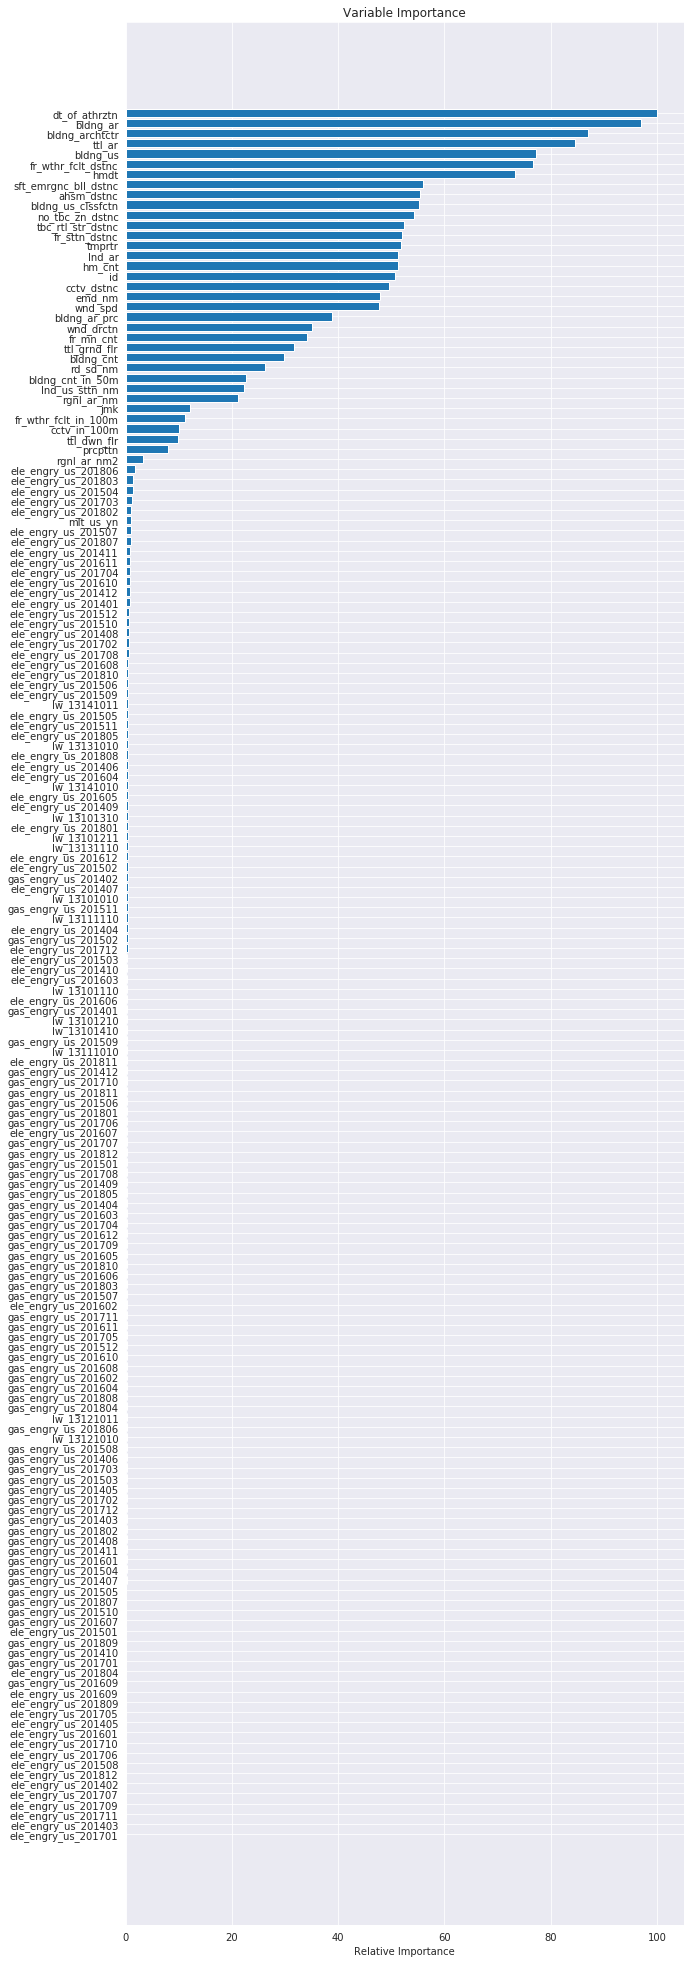

In [0]:
plot_feature_importance(model, X_train, (10, 35))

# Submission

In [0]:
y = model.predict(test)


In [0]:
sub['fr_yn'] = y
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

,fr_yn
0,N
1,N
2,N
3,N
4,N


In [0]:
sub.to_csv(path + 'baseline_rf.csv', index=False)